# Informatics 1 Cognitive Science (2017–2018)
## Assignment 2: Clustering and Categorization

------------------------

## Answering questions
The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code
In every place where you need to write code you will see:

    YOUR CODE HERE

    raise NotImplementedError()

or

    YOUR CODE HERE

Delete the raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

### Text
For questions that require you to write text the cell will say YOUR ANSWER HERE. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, however these cells will not be part of your submission and will not be considered for marking! Thus, make sure that all your solutions are contained in the marked cells.

------------------------


# Introduction

In this task you will induce semantic categories for a set of words by clustering them into sets of semantically related words. You will cluster the words on the basis of their
representations in a space of semantic features, applying **agglomerative hierarchical clustering**. We
will use the [**linkage**](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function from scikit-learn to do the clustering:

$$\mathbf{Z} = \mathbf{linkage}(\mathbf{X},\mathbf{method},\mathbf{metric})$$

The function performs agglomerative hierarchical clustering of the rows of matrix **X**
and returns tree **Z** encoding a dendrogram of the resulting hierarchical clusters. 
The argument **method** describes the clustering criterion, i.e., how to measure the distance
between clusters. 

In the lectures, we discussed three different clustering criteria:

- **single-linkage**, (called 'single' in scikit-learn)
- **complete-linkage**, ('complete')
- **group average**, ('average')
The argument **metric** specifies the function that will be used to compute distances between the rows of **X**. We will use cosine distance (via the argument 'cosine')[(*1)](#References).

## A simple example
Let's first go through an example to show what you'll need to know for task 1. 

In [6]:
# import numpy, the python scientific package
import numpy as np

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

In [7]:
'''
Assume we are given matrix contains features for four letters. 
Each letter's features are a row in the matrix A. 

In this case, the features are made up and don't have any particular
interpretation.
'''

A = np.matrix([[1,2,3],[1,2,5],[7,1,-5],[3,4,6]])
print(A)

[[ 1  2  3]
 [ 1  2  5]
 [ 7  1 -5]
 [ 3  4  6]]


In [8]:
# The letters are defined in:
letters = ['a','o','k','e']
print(letters)

['a', 'o', 'k', 'e']


We'll now do hierarchical clustering on the data using the single-linkage criterion.


In [9]:
# First, import the linkage function from scipy library
from scipy.cluster.hierarchy import linkage

'''
Now, we use the linkage function on the feature matrix A,
with our chosen criterion and distance function: 
'''

TreeA = linkage(A,'single','cosine')

Now we have two options to further inspect the clustering. 

### Visualising dendograms

The first option is to view the corresponding dendrogram. Try it out and make sure you understand how to read it.

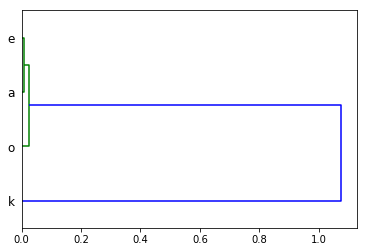

In [212]:
# import the dendrogram function from scipy
from scipy.cluster.hierarchy import dendrogram

dendrogram(TreeA, labels=letters, orientation= 'right');

### Working with clusters
The second option is to obtain the clusters at a certain height in the tree. This is done with the function **fcluster**, where we have to specify the maximum number **t** of the resulting clusters.

The function returns a column vector **clustering** of size 4, where row i contains the cluster assignment of row (item) i of matrix A. 

Try it out with an increasing number of maximum clusters, starting with t=1. 

In [11]:
# import the flat cluster function from scipy
from scipy.cluster.hierarchy import fcluster

In [12]:
clustering = fcluster(TreeA,t=1, criterion= 'maxclust')

In [213]:
for i in [1,2,3,4,5,6]:
    clustering = fcluster(TreeA,t=i, criterion= 'maxclust')
    print('Number of maximum clusters:',i)
    for letter, cluster in zip(letters, clustering):
       print (letter,':', cluster)


Number of maximum clusters: 1
a : 1
o : 1
k : 1
e : 1
Number of maximum clusters: 2
a : 1
o : 1
k : 2
e : 1
Number of maximum clusters: 3
a : 1
o : 1
k : 2
e : 1
Number of maximum clusters: 4
a : 1
o : 1
k : 2
e : 1
Number of maximum clusters: 5
a : 1
o : 1
k : 2
e : 1
Number of maximum clusters: 6
a : 1
o : 1
k : 2
e : 1


Compare it with the dendrogram of your clustering and discuss briefly.

When we set the number of maximum clusters to 1, we have all the letters 'a', 'o', 'k' and 'e' in one cluster. As we increase the number of maximum clusters to 2, we have two clusters: a cluster containing 'a', 'o' and 'e', and another cluster containing just 'k'. As we continue to increase the number of maximum clusters to 3, 4, 5, and even 6, I noticed that there is no change in classification. This means that no matter how big the number of maximum clusters gets, there can't be more than 2 clusters. From this we can conclude that the letters are classified based on them being a 'vowel' or a 'consonant'. The letters 'a', 'o' and 'e' are all vowels, hence the distance between them is really small compared to the distance of each to the letter 'k', hence they can't be put in the same cluster with 'k', which is a consonant.

## Loading the data

For our task, you will use the data relating to Task 1. Let's load the files we'll need to the notebook.

In [16]:
''' First, we import the pandas [pandas.pydata.org] library,a useful package for data analysis. 
If you don't have conda installed, type: 
"conda install pandas" 
in the terminal in your cogsci environment. 
'''
import pandas as pd 

# edit the pandas display options
pd.set_option('display.max_columns', 12)

In [17]:
# then we import the different files relating to Task 1
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()

matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).as_matrix()
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).as_matrix()

### About the data
You've just loaded the words we want to cluster, in **words1**. These are the the 44 most frequently-occurring content words in the British National Corpus [(BNC)[1]](#References). You can see what each word is (e.g., banana, boat) by printing the **words1** matrix. 

You have also loaded two matrices of features: **matrix1_mcrae** and **matrix1_bnc**

Each of the two matrices represents a different set of features for the words in **words1**.

**matrix1 bnc** is a 44×2497 matrix where each row contains features for the corresponding word in **words1**. The features are the number of times a target word co-occurs with a context word in the BNC, using a context window of ± 5 words. 

**matrix1_mcrae** is a 44 × 2526 matrix where each row contains features for the corresponding word in **words1**. The  features are based on judgments by humans in a "norming" study conducted by [McRae et al. [2]](#References). 

The list of features can be seen in **feats_mcrae**. To do this, you can print **feats_mcrae** in the cell below. Notice that there are many features, so they won't print all at once. Remember that you can print specific entries in a matrix using notation like `feats_mcrae[200:240]` -- that will product the 200th through the 240th features in the McRae corpus.

Each matrix cell in **matrix1_mcrae** corresponds to the number of humans that listed a feature for a given target word. (You have already worked with McRae et al.’s data in assignment 1).

Start by inspecting the data (e.g. using the print() command) and make sure you understand what each file contains.

In [18]:
print("words1 =",words1)
print("matrix1_mcrae =",matrix1_mcrae)
print("matrix1_bnc =",matrix1_bnc)
print("feats_mcrae =",feats_mcrae)
#raise NotImplementedError()

words1 = ['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
matrix1_mcrae = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
matrix1_bnc = [[  3   4   9 ...   0   0   0]
 [ 95  68  50 ...   0   0   0]
 [ 49  35  70 ...   0   0   0]
 ...
 [130  57  62 ...   0   0   0]
 [ 13  10   8 ...   0   0   0]
 [  3   5   5 ...   0   0   0]]
feats_mcrae = ['a_baby_bird' 'a_baby_cow' 'a_baby_deer' ... 'worn_with_suits'
 'worn_with_suspenders' 'worn_with_ties']


# Task 1: Semantic Categories

## Question 1 (15%): 
a) Cluster the target words on the basis of the vector representations obtained from the BNC. 
Do this by using all three clustering criteria (single-linkage, complete-linkage, and average-linkage). 
Show the dendrogram output for each criterion. Make sure the plots are readable. You can use multiple cells to plot each tree.

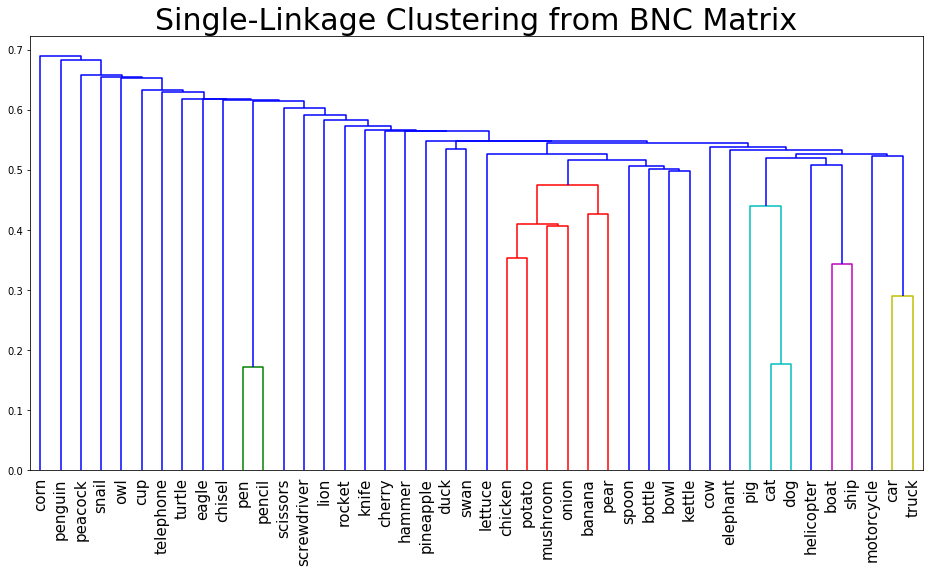

In [124]:
# YOUR CODE HERE

f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Single-Linkage Clustering from BNC Matrix", size=30)
single_BNC = linkage(matrix1_bnc, 'single','cosine')
ax1 = dendrogram(single_BNC, labels=words1, orientation='top', leaf_font_size=15);

#raise NotImplementedError()

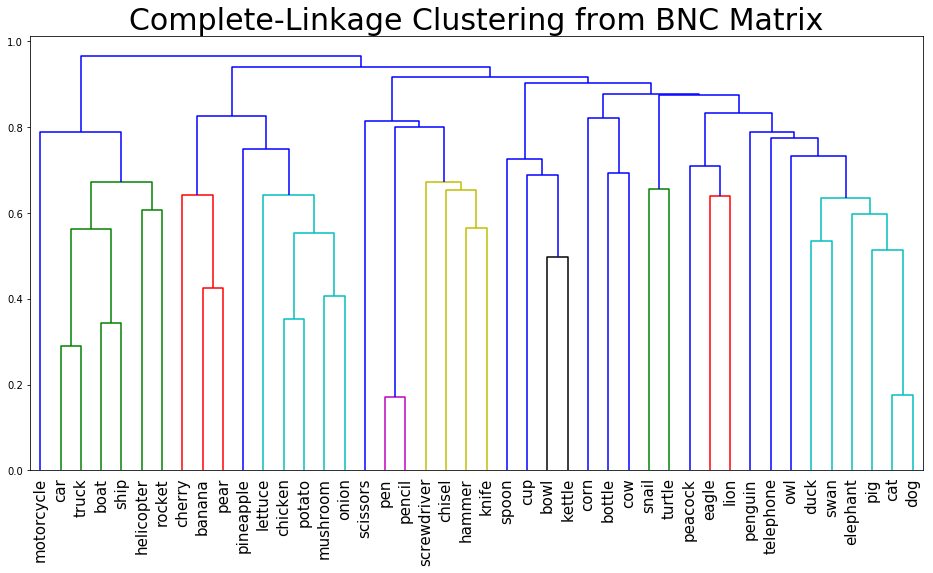

In [123]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Complete-Linkage Clustering from BNC Matrix",size=30)
complete_BNC = linkage(matrix1_bnc, 'complete','cosine')
ax1 = dendrogram(complete_BNC, labels=words1, orientation='top', leaf_font_size=15);

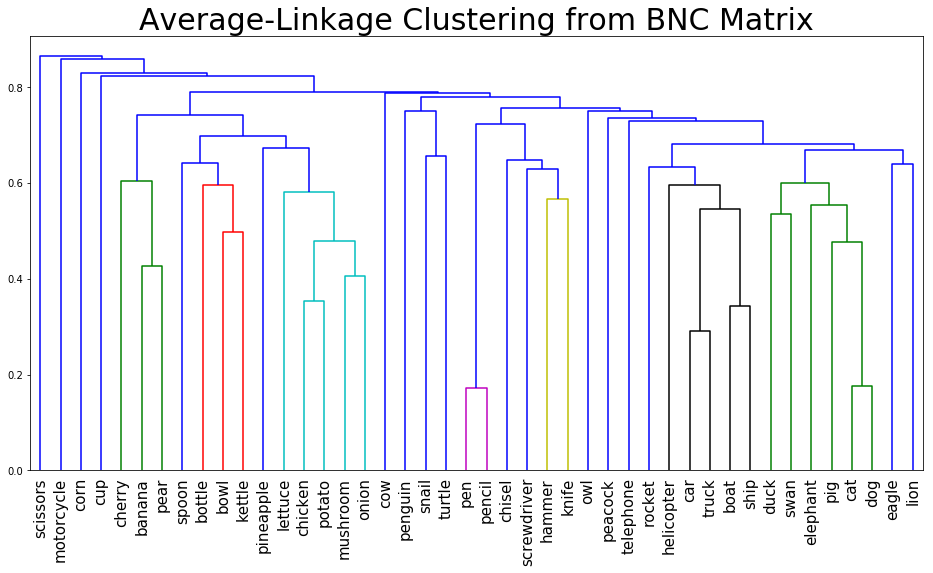

In [122]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Average-Linkage Clustering from BNC Matrix",size=30)
average_BNC = linkage(matrix1_bnc, 'average', 'cosine')
ax1 = dendrogram(average_BNC, labels=words1, orientation='top', leaf_font_size=15);

b) Which criterion do you think gives the most reasonable clusterings? Explain the differences between the criteria in your own words, and interpret their differences in clustering.

The three criteria differ in the way they merge clusters and how the distance is measured between each cluster.

Complete linkage hierarchical clustering measures the longest distance between two points in each cluster and merging the two clusters with the smallest maximum pairwise distance (clustering the two most dissimilar documents). Single linkage hierarchical clustering measures the shortest distance between two points in each cluster and merging the two clusters with the smallest minimum pairwise distance (clustering the two most similar documents). Average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

Through inspection, I can see that Complete Linkage classifies the objects into their most appropriate clusters. You can tell that each member in a cluster shares a distinctive category, like how 'motorcycle', 'car', 'truck', 'boat', 'ship', 'helicopter', and 'rocket' are all vehicles, and how 'scissors', 'pen', 'pencil', 'screwdriver'. 'chisel', 'hammer', and 'knife' are all tools. There are some misclassifications like how 'telephone' is under the same cluster with other animals, but out of all the three criteria, I still think that the Complete Linkage criterion exhibits the most sensible and meaningful clusterings.

## Question 2 (10%) :  
a) Cluster the target words again, but this time on the basis of the vector representations obtained from McRae et al.’s data. Again, perform the clustering for all three criteria and answer questions (a)–(b) above. 

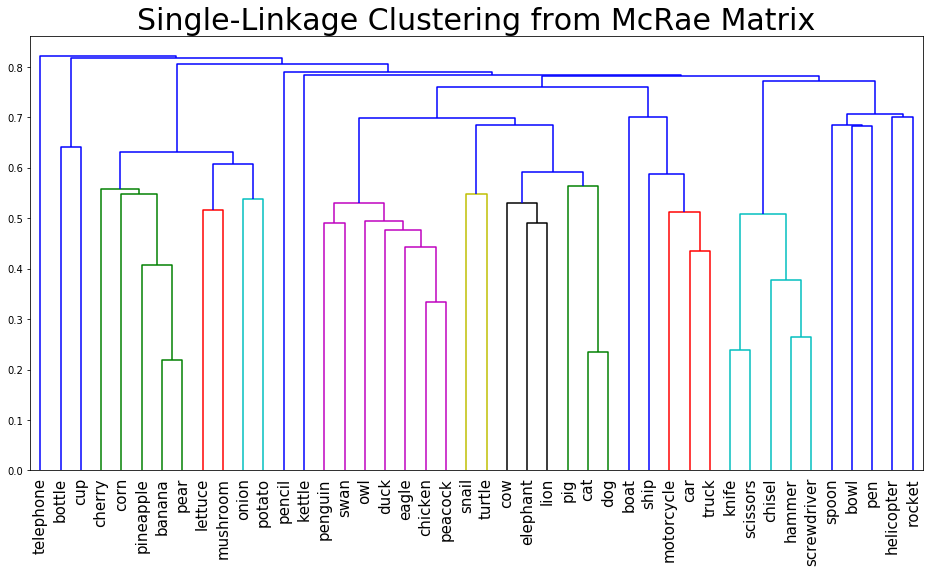

In [119]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Single-Linkage Clustering from McRae Matrix", size=30)
single_McRae = linkage(matrix1_mcrae, 'single', 'cosine')
ax1 = dendrogram(single_McRae, labels=words1, orientation= 'top', leaf_font_size=15);

#raise NotImplementedError()

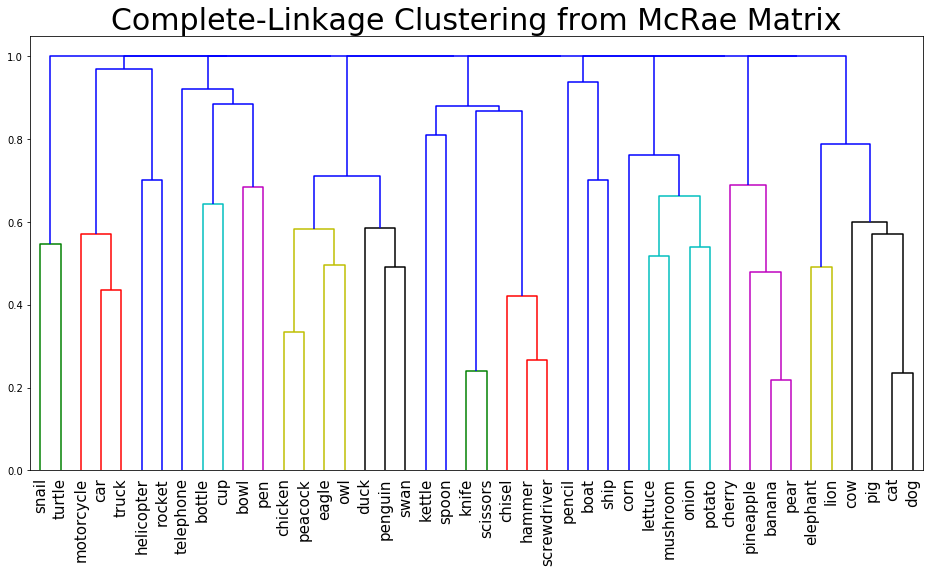

In [120]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Complete-Linkage Clustering from McRae Matrix", size=30)
complete_McRae = linkage(matrix1_mcrae, 'complete', 'cosine')
ax1 = dendrogram(complete_McRae, labels=words1, orientation= 'top', leaf_font_size=15);

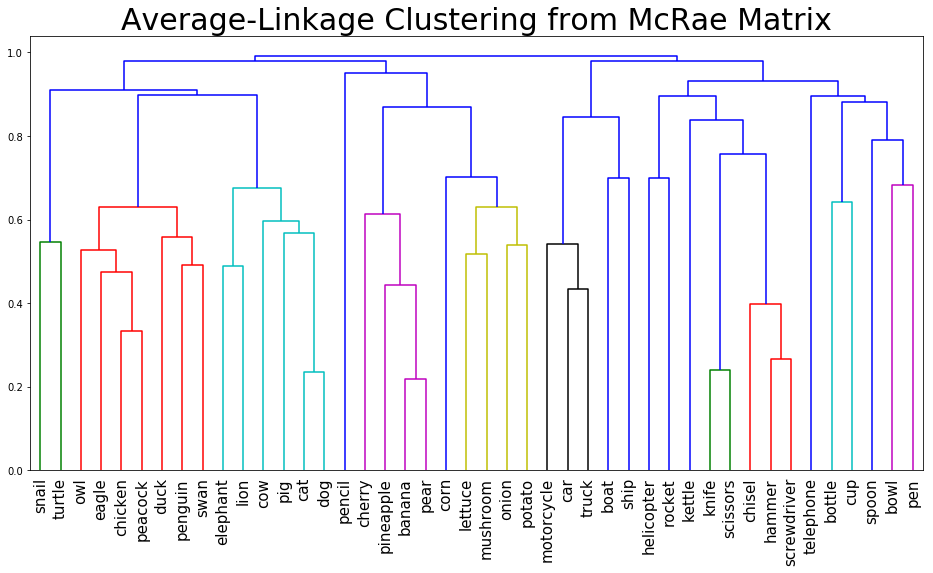

In [121]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(16,8))
plt.title("Average-Linkage Clustering from McRae Matrix", size=30)
average_McRae = linkage(matrix1_mcrae, 'average', 'cosine')
ax1 = dendrogram(average_McRae, labels=words1, orientation= 'top', leaf_font_size=15);
# use leaf_font_size

b) Which criterion gives the most reasonable clusterings according to the words helicopter and bottle? 

For the word 'helicopter', the most reasonable clustering is the Complete Linkage because it places 'helicopter' under the same cluster with the word 'rocket'. Both of these words have similar properties, such as how they represent 'vehicles' and they both have the behaviour 'flies'. Hence, it is only appropriate that these two words are clustered together. Furthermore, the cluster containing 'helicopter' and 'rocket' is also a member of a much larger cluster which includes the words 'motorcycle', 'car', and 'truck', which are also 'vehicles', but they travel on land (does not fly). In the Single Linkage clustering, 'helicopter' is clustered with 'rocket' as well, but then that cluster belongs to a bigger cluster that contains objects such as 'spoon', 'bowl', and 'pen', which falls under the 'tool' category. Average Linkage also clusters 'helicopter' with a set of tools.

The same goes for the word 'bottle'. The Complete Linkage clustering had clustered the word 'bottle' under the same cluster with the word 'cup'. Both of these words exhibit similar properties, which may include being kitchen tools that you drink liquids out of. Looking at the bigger cluster, the Complete Linkage clustering has also placed the cluster containing the words 'bottle' and 'cup' with the words 'telephone', 'bowl', and 'pen', which shares similar (but more general) properties and fall under the same category which is 'tool'.


## Question 3 (10%): 
a) How do the clusters obtained from the two vector representations (BNC and McRae) differ? Discuss which vector representations yields more intuitive and semantically coherent clusters, based on the clustering of the words helicopter and bottle. 

Overall, I think that the vector representations obtained from the McRae vector yields more intuitive and semantically coherent clusters than the BNC vector. The BNC vector representation tends to yield more individual clusters than subclusters, failing to group similar words together. The McRae vector representation has plenty of subclusters under the main clusters which groups words with similar features together. The McRae vector representation more successfully places words which are closely related featurewise in the same category, compared to the BNC vector representation.

The reason behind why the McRae vector cluster words better than the BNC vector is that the McRae vector works on the notion of clustering words that have common features, and these features are determined by humans themselves. So, clustering words with the McRae vector representation are closely related to the human intuition when it comes to categorisation of words. On the other hand, the BNC vector representation is based on the co-occurrence of a target word with a context word. So, when using the BNC vector to categorise things, it will be more accurate in categorising which words are more commonly used together than actually putting them in their appropriate semantic categories.

b) What can you infer from the clustering with respect to the semantic category of chicken? Which representation (based on the BNC or McRae’sfeature norms) do you think yields a better clustering for it? 


In the BNC vector representation, the word 'chicken' is often placed within a cluster containing foods. In Single Linkage clustering, it is in a cluster with 'potato', and both of them are within another cluster containing the words 'mushroom', 'onion', and then in another cluster containing 'banana' and 'pear', which are all foods. In Complete Linkage clustering, the word 'chicken' is placed in the same cluster with 'potato', then with 'mushroom', 'onion', and 'lettuce', which are all under a bigger cluster containing foods such as 'pineapple', 'pear', 'banana', and 'cherry'. Finally, this trend of semantically categorising 'chicken' as food is also observed in the Average Linkage clustering, where 'chicken' is again placed under the same cluster with 'potato', then under a cluster with 'lettuce', 'mushroom' and 'onion', and then with 'pineapple'.

However, in the McRae vector representation, the word 'chicken' is often clustered with words that are semantically categorised as animals instead of food. In Single Linkage clustering, it is first clustered with the word 'peacock', then with 'eagle', then 'duck', 'owl', and then finally with 'penguin' and 'swan', which are all animals. 'Chicken' is also placed in a group of animals in Complete Linkage clustering. It is first clustered with 'peacock', then with 'eagle' and 'owl', and then with 'duck', 'penguin', and 'swan'. Finally, in the Average Linkage clustering, 'chicken' is first clustered with 'peacock', then with 'eagle', 'owl', and then with 'duck', 'penguin' and 'swan'. This further confirms the trend that in the McRae vector representation, the word 'chicken' is semantically categorised as an 'animal' and not a 'food'.

The fact that 'chicken' is categorised as a food in the BNC vector representation and an animal in the McRae vector representation shows us that the word 'chicken' frequently co-occurs with other words that fall under the 'food' category, meaning it is often contextually referred as a food than as an animal in British English. However, in the McRae vector representation, the word 'chicken' falls under the semantic category of 'animal' because it exhibits more properties that are distinctive towards animals, such as being a living thing and is able to move.

As to which representation yields a better clustering, I think it would be the McRae vector representation because it shows which semantic category 'chicken' falls into, whilst the BNC vector representation shows how often the word 'chicken' co-occurs with words in a particular category in daily usage.

## Question 4 (10%) 
Finally, compare the clusterings you obtain for BNC and McRae vectors against the provided human-produced gold standard classifications.

The gold standard classifications were obtained by presenting the words to human participants asking them to name the category to which each noun belonged. Participant responses were freeform strings, i.e., participants were not provided with a list of possible categories. After adjusting for differences in spelling and grouping together synonyms, these responses were used to determine the most “correct” category label for each of the  nouns.

To make things easier, only look at the clusters obtained when setting the maximum number of clusters to 6 (which corresponds to the number of most fine-grained gold clusters). 

In [44]:
# let's import the human classifications
human_classification_names = pd.read_csv("./categories.txt", index_col=0)

In [202]:

Tree1 = linkage(matrix1_bnc, 'single', 'cosine')
clustersSingleBNC = fcluster(Tree1, t=6, criterion='maxclust')

Tree2 = linkage(matrix1_bnc, 'complete', 'cosine')
clustersCompleteBNC = fcluster(Tree2, t=6, criterion='maxclust')

Tree3 = linkage(matrix1_bnc, 'average', 'cosine')
clustersAverageBNC = fcluster(Tree3, t=6, criterion='maxclust')

    
Tree4 = linkage(matrix1_mcrae, 'single', 'cosine')
clustersSingleMcRae = fcluster(Tree4, t=6, criterion='maxclust')

Tree5 = linkage(matrix1_mcrae, 'complete', 'cosine')
clustersCompleteMcRae = fcluster(Tree5, t=6, criterion='maxclust')

Tree6 = linkage(matrix1_mcrae, 'average', 'cosine')
clustersAverageMcRae = fcluster(Tree6, t=6, criterion='maxclust')

Compare the clusterings to the gold standard by inspecting the data. To do this, you can use the function "print_clusters" below to inspect the clusters. The function takes the vector of words and a vector of cluster indeces as input and prints the clusters together.

In [203]:
def print_clusters(words_vector, cluster_indeces):
    # iterate through categories
    for category_index in range(1,7):
        # iterate through all the classifications
        for index, category in enumerate(cluster_indeces):
            # if the word belongs to the current category (1-6), print it 
            if category == category_index:
                print (words_vector[index])
        print () 

In [204]:
print('---------- Single BNC ----------')
print_clusters(words1, clustersSingleBNC)

---------- Single BNC ----------
banana
boat
bottle
bowl
car
cat
cherry
chicken
chisel
cow
cup
dog
duck
eagle
elephant
hammer
helicopter
kettle
knife
lettuce
lion
motorcycle
mushroom
onion
pear
pen
pencil
pig
pineapple
potato
rocket
scissors
screwdriver
ship
spoon
swan
telephone
truck
turtle

owl

snail

peacock

penguin

corn



In [205]:
print('---------- Complete BNC ----------')
print_clusters(words1, clustersCompleteBNC)

---------- Complete BNC ----------
boat
car
helicopter
motorcycle
rocket
ship
truck

banana
cherry
chicken
lettuce
mushroom
onion
pear
pineapple
potato

chisel
hammer
knife
pen
pencil
scissors
screwdriver

bowl
cup
kettle
spoon

bottle
corn
cow

cat
dog
duck
eagle
elephant
lion
owl
peacock
penguin
pig
snail
swan
telephone
turtle



In [206]:
print('---------- Average BNC ----------')
print_clusters(words1, clustersAverageBNC)

---------- Average BNC ----------
banana
bottle
bowl
cherry
chicken
kettle
lettuce
mushroom
onion
pear
pineapple
potato
spoon

boat
car
cat
chisel
cow
dog
duck
eagle
elephant
hammer
helicopter
knife
lion
owl
peacock
pen
pencil
penguin
pig
rocket
screwdriver
ship
snail
swan
telephone
truck
turtle

cup

corn

motorcycle

scissors



In [207]:
print('---------- Single McRae ----------')
print_clusters(words1, clustersSingleMcRae)

---------- Single McRae ----------
bottle
cup

banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato

boat
bowl
car
cat
chicken
chisel
cow
dog
duck
eagle
elephant
hammer
helicopter
knife
lion
motorcycle
owl
peacock
pen
penguin
pig
rocket
scissors
screwdriver
ship
snail
spoon
swan
truck
turtle

kettle

pencil

telephone



In [208]:
print('---------- Complete McRae ----------')
print_clusters(words1, clustersCompleteMcRae)

---------- Complete McRae ----------
banana
boat
bottle
bowl
car
cat
cherry
chicken
chisel
corn
cow
cup
dog
duck
eagle
elephant
hammer
helicopter
kettle
knife
lettuce
lion
motorcycle
mushroom
onion
owl
peacock
pear
pen
pencil
penguin
pig
pineapple
potato
rocket
scissors
screwdriver
ship
snail
spoon
swan
telephone
truck
turtle








In [209]:
print('---------- Average McRae ----------')
print_clusters(words1, clustersAverageMcRae)

---------- Average McRae ----------
cat
chicken
cow
dog
duck
eagle
elephant
lion
owl
peacock
penguin
pig
snail
swan
turtle

banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato

pencil

boat
car
motorcycle
ship
truck

chisel
hammer
helicopter
kettle
knife
rocket
scissors
screwdriver

bottle
bowl
cup
pen
spoon
telephone



In [210]:
print('---------- Gold Standard ----------')
print(human_classification_names)

---------- Gold Standard ----------
           NOUN                        CLASS
0        banana  fruitTree-vegetable-natural
1        cherry  fruitTree-vegetable-natural
2          pear  fruitTree-vegetable-natural
3     pineapple  fruitTree-vegetable-natural
4        bottle       tool-artifact-artifact
5          bowl       tool-artifact-artifact
6        chisel       tool-artifact-artifact
7           cup       tool-artifact-artifact
8        hammer       tool-artifact-artifact
9        kettle       tool-artifact-artifact
10        knife       tool-artifact-artifact
11       pencil       tool-artifact-artifact
12          pen       tool-artifact-artifact
13     scissors       tool-artifact-artifact
14  screwdriver       tool-artifact-artifact
15        spoon       tool-artifact-artifact
16    telephone       tool-artifact-artifact
17         boat    vehicle-artifact-artifact
18   motorcycle    vehicle-artifact-artifact
19          car    vehicle-artifact-artifact
20   helicopter    

Can you draw any conclusions regarding which semantic space representation (BNC vs McRae) and which clustering criterion works best? Discuss below.

None of the semantic space representation perfectly matches the Gold Standard classification. There are several misclassifications that are unique to one semantic space representation but there are also some that are common in both.

The first common misclassification lies mainly in the category tool-artifact-artifact. Most of the BNC and McRae semantic space representation placed them in several different clusters. The reason behind this misclassification might be because the category 'tool' is very vague and not distinctive. To solve this issue, more categories can be added, and words within a cluster will have more similarity. For example, instead of putting 'knife' and 'telephone' under the cluster 'tool', you can put 'knife' along with 'spoon' in 'kitchen utensils' and 'telephone' in 'electronic devices' along with 'kettle'.

In addition to that, both the BNC and McRae semantic space representation tend to just combine the categories green-vegetable-natural with fruitTree-vegetable-natural under one big cluster which looks like it would be the category 'food'.

Furthermore, as I discussed in Question(3(b)), the BNC space representation classifies 'chicken' as something that belongs to the category 'food'. However, there is no such category called 'food' in the list of Gold Standard classes. You can't necessarily fit 'chicken' under 'green-vegetable-natural' nor can you fit it under 'fruitTree-vegetable-natural'. Therefore the misclassification of 'chicken' in any BNC space representation is as predicted.

The BNC space representation cluster the words based on the frequency of their co-occurrence with other context words in the corpus, and not their features. The Gold Standard classes differentiate the category 'animal' into two clusters: bird-animal-natural and groundAnimal-animal-natural. Since the BNC does not contain the features of each animal as well as the distinctive features of birds and ground animals, it does not know whether an animal falls under the 'bird' or the 'ground animal' category.

After a thorough inspection of the clusters, I think the semantic space and clustering criterion that works best is the McRae semantic space and the Average Link clustering criterion. Despite several misclassifications and overgeneralizations, I feel like the clusterings placed words in their relatively appropriate and meaningful semantic categories.

A probable reason behind why the McRae semantic space is much more suitable than the BNC semantic space is because the McRae semantic space clusters the items based on the similarity of their features. On the other hand, the BNC semantic space counts the frequency of the co-occurrence of the target word with the words the BNC corpus. Basically, the BNC does not tell you how similar two objects are, it tells you more about how often are the two words used together contextually.

Also, the Average Linkage clustering criterion provided the best classifications. This might be because the Complete Linkage clustering pays attention to clustering outliers and forcing them into what it thinks is the most appropriate category and that the Single Linkage clustering has a tendency to form individual clusters and link single words, forming a long chain of words that do not possess any meaningful similarity.

# Task 2: Exemplar-based Model
In this task you will identify the semantic category of new words based on established categories of known words. You will do this by building an **exemplar-based model** that identifies the category of each new word by comparing it with known exemplars, again on the basis of their semantic space representations. Specifically, the model determines the category of a new word as follows:

- It measures the new word's pairwise similarity to all known exemplars. This is done by computing the cosine similarity (i.e., cosine of the angle) between the new word’s vector representation and the vector representation of each known exemplar.


- It then assigns the new word the category of the exemplar that yielded the highest similarity score.


In Task 1, you worked with the known exemplars. 
The data for Task 2 contains the new target words you want to find categories for. In this task you will additionally use the files **categorynames.csv** and **categoryindices.csv** which lists the semantic category of every target word in the Task1. 

The categories (obtained from [here](http://wordspace.collocations.de/doku.php/data:esslli2008:concrete_%20nouns_categorization)) are six in total (e.g., bird-animalnatural,vehicle-artifact-artifact). They are organised hierarchically: from top classes (i.e. artifact and natural) to more finegrained categories (e.g. groundAnimal or fruitTree).

**category_names** (corresponding to the **categorynames.csv** file) is a column vector with one category name per row and **category_indices** (corresponding to the **categoryindices.csv** file) is a column vector which indexes each target word in **words1** with a category number ranging from 1 to 6. The index itself corresponds to the row number in **categorynames**.

In [35]:
# We import the different files for task 2
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).as_matrix()
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).as_matrix()

In [36]:
# we import the files relating to **categories**
category_names = pd.read_csv("./categorynames.csv", index_col=0).values.flatten()
category_indices = pd.read_csv("./categoryindices.csv", index_col=0).values.flatten()

## Question 5 (15%)
Implement the exemplar-based model as described above. Apply your implementation to predict the categories for the new words in words2, using the
vector space from McRae et al.’s data. Inspect the output of your model manually. Based on your intuitions discuss which words you think were correctly classified, and which ones
weren’t. Can you think of an explanation for the classifications and misclassifications?

In [214]:
# first implement the cosine similarity function
def cosine_sim(M1,M2):
    dot_product = np.dot(M1,M2)
    norm_a = np.linalg.norm(M1)
    norm_b = np.linalg.norm(M2)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [104]:
# Implement the exemplar-based categorisation model here. 
def exemplar_model(exemplar_matrix, target_matrix, words2categorise):    
    # create a vector predictedCatIndices in which you save the predicted category index 
    predictedCatIndices = [] 
    
    # for each item
        # STEP 1:
        # compute the cosine similarity between the new word’s vector representation 
        # and the vector representation of each known exemplar using the cosine_sim function
        
    
    for i in target_matrix:
        simvector = []
        for j in exemplar_matrix:
            sim = cosine_sim(i, j)
            simvector.append(sim)
            
            
    # STEP 2: 
    # assign the new word the category of the exemplar that yielded the highest similarity score
        
        maximum = simvector[0]
        
        for k,similarity in enumerate(simvector):
            if similarity > maximum:
                maximum = similarity
                index = k
    
        predictedCatIndices.append(category_indices[index])

    return predictedCatIndices

In [135]:
# testing if the exemplar model works and makes sense
print(exemplar_model(matrix1_mcrae, matrix2_mcrae, words2))

[0, 0, 4, 1, 2, 3, 0, 4, 4, 4, 5, 5, 4, 3, 5, 3]


In [105]:
result = exemplar_model(matrix1_mcrae, matrix2_mcrae, words2)

for index,i in enumerate(result):
    print(words2[index] + " = " + category_names[i])
    

airplane = bird-animal-natural
bathtub = bird-animal-natural
belt = tool-artifact-artifact
blueberry = fruitTree-vegetable-natural
broccoli = green-vegetable-natural
calf = groundAnimal-animal-natural
hawk = bird-animal-natural
dagger = tool-artifact-artifact
fork = tool-artifact-artifact
guitar = tool-artifact-artifact
house = vehicle-artifact-artifact
missile = vehicle-artifact-artifact
razor = tool-artifact-artifact
salmon = groundAnimal-animal-natural
tank = vehicle-artifact-artifact
worm = groundAnimal-animal-natural


## Question 6  (10%)
Use your exemplar model to predict the categories for the new words, this time with the vector space constructed from the BNC. 


In [126]:
results2 = exemplar_model(matrix1_bnc, matrix2_bnc, words2)

for index,i in enumerate(results2):
    print(words2[index] + " = " + category_names[i])

# raise NotImplementedError()

airplane = vehicle-artifact-artifact
bathtub = tool-artifact-artifact
belt = vehicle-artifact-artifact
blueberry = bird-animal-natural
broccoli = green-vegetable-natural
calf = groundAnimal-animal-natural
hawk = vehicle-artifact-artifact
dagger = tool-artifact-artifact
fork = tool-artifact-artifact
guitar = tool-artifact-artifact
house = vehicle-artifact-artifact
missile = vehicle-artifact-artifact
razor = tool-artifact-artifact
salmon = bird-animal-natural
tank = tool-artifact-artifact
worm = bird-animal-natural


Which words were correctly classified, and which ones weren’t?  
Can you think of an explanation for the classifications and misclassifications?

Correctly classified words = airplane, bathtub, broccoli, calf, dagger, fork, guitar, razor

Incorrectly classified words = belt, blueberry, hawk, house, missile, salmon, tank, worm

BNC classifies words in the notion of the frequency of a target word co-occurring with a context word. Hence, it places words that are often used together in the same category, but it does not necessarily mean that they belong to the same semantic category.

Let's take a look at the misclassified words and the possible reasons why they were misclassified.

At first, I was confused as to why a 'blueberry' is classified as a 'bird' since it is obviously a fruit and it does not fly. However, I realized that blueberries do not grow on trees. But that still does not explain why it is classified as a bird. Reminding myself that the BNC vector representation classifies words based on co-occurrence frequencies, I typed in 'blueberry bird' in a search engine and found plenty of articles about how to keep birds from eating your blueberries. This frequent co-occurrence between the word 'blueberry' and 'bird' is the most probable reason why the model misclassified 'blueberry' as a 'bird'.

It is obvious that most of the animals are misclassified. Out of 4 animals (calf, hawk, salmon, and worm), only 'calf' was correctly classified. Unlike the McRae vector representation, BNC does not really classify words based on their features but based on their co-occurrence with other words instead, which results to illogically classifying such words in a category that lacks similarity featurewise but are often contextually used together in British English.

The words 'tank' and 'missile' are rarely used in daily British English and is more often found in military-related text/speeches. Hence, the word 'tank' does not occur with other vehicles and 'missile' does not occur with other tools regularly. This lack of co-occurrence causes the BNC vector representation to misclassify the words 'tank' and 'missile'.

For the word 'house', it is misclassified because I don't think people often use it contextually while referring to places to stay in. For example, a travel brochure might have the words 'hotel' and 'resort' when referring to accommodation, but rarely 'house'. Therefore the word 'house' rarely co-occur with words that fall under the 'accommodation' or 'lodging' category.



## Question 7 (15%) 
Implement the Manhattan distance function. The [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) is the sum of absolute differences between points : 
$ \sum_{i=1}^{N} |x_i-y_i| $, where $x_i$ and $y_i$ are individual dimensions of vector $\mathbf{x}$ and $\mathbf{y}$, each of length $N$.

In [224]:
def Manhattan_Distance(M1,M2):
    return sum(abs(y - x) for x,y in zip(M1, M2))

In [225]:
def exemplar_model_manh(exemplar_matrix, target_matrix, words2categorise):    
    
    # create a vector predictedCatIndices in which you save the predicted category index 
    
    predictedCatIndices = [] 
    
    # for each item
    
        # STEP 1:
        # compute the Manhattan Distance between the new word’s vector representation 
        # and the vector representation of each known exemplar using the Manhattan_Distance function
        
    
    for i in target_matrix:
        simvector2 = []
        for j in exemplar_matrix:
            sim2 = Manhattan_Distance(i, j)
            simvector2.append(sim2)
            
            
    # STEP 2: 
    # assign the new word the category of the exemplar that yielded the highest similarity score
        
        minimum = simvector2[0]
        
        for k,similarity in enumerate(simvector2):
            if minimum > similarity:
                minimum = similarity
                index = k
    
        predictedCatIndices.append(category_indices[index])

    return predictedCatIndices

print("---------- McRae ----------")

resultMcRae = exemplar_model_manh(matrix1_mcrae, matrix2_mcrae, words2)

for index,i in enumerate(resultMcRae):
    print(words2[index] + " = " + category_names[i])
    
print("  ")
print("  ")
    
print("---------- BNC ----------")

resultBNC = exemplar_model_manh(matrix1_bnc, matrix2_bnc, words2)

for index,i in enumerate(resultBNC):
    print(words2[index] + " = " + category_names[i])
    

---------- McRae ----------
airplane = vehicle-artifact-artifact
bathtub = tool-artifact-artifact
belt = vehicle-artifact-artifact
blueberry = fruitTree-vegetable-natural
broccoli = green-vegetable-natural
calf = groundAnimal-animal-natural
hawk = bird-animal-natural
dagger = tool-artifact-artifact
fork = tool-artifact-artifact
guitar = tool-artifact-artifact
house = vehicle-artifact-artifact
missile = vehicle-artifact-artifact
razor = tool-artifact-artifact
salmon = tool-artifact-artifact
tank = vehicle-artifact-artifact
worm = vehicle-artifact-artifact
  
  
---------- BNC ----------
airplane = tool-artifact-artifact
bathtub = tool-artifact-artifact
belt = tool-artifact-artifact
blueberry = tool-artifact-artifact
broccoli = tool-artifact-artifact
calf = tool-artifact-artifact
hawk = tool-artifact-artifact
dagger = tool-artifact-artifact
fork = tool-artifact-artifact
guitar = tool-artifact-artifact
house = vehicle-artifact-artifact
missile = vehicle-artifact-artifact
razor = tool-arti

a) How does the cosine similarity differ from the Manhattan distance similarity? Give a pair of vectors that are close according to cosine distance but far according to Manhattan distance.

Similarity in general measures how alike two data objects are. The distance measured represents the features of the objects. If the distance is small, the degree of similarity will be high. Otherwise, if the distance is large, the degree of similarity will be low.

Cosine similarity allows us to find the cosine of the angle between the two vectors. Cosine similarity measures the orientation of two vectors and not particularly its magnitude: two vectors with the same orientation will have a cosine similarity of 1, and two vectors that are right angled to each other (90 degrees) have a similarity of 0.

Manhattan distance similarity measures the distance between two points by calculating the sum of the absolute differences of their Cartesian coordinates. It is the total sum of the difference between the x coordinates and y coordinates. Hence it is the distance between two points measured along axes at right angles. The use of Manhattan Distance is only useful when you have a large dataset and you want to 'ignore' outlier data. 

In [222]:
# Pair of vectors that are close according to cosine distance but 
# far according to Manhattan distance.

a = [1,2,3]
b = [4,5,6]

print('Cosine Similarity =',cosine_sim(a,b))
print('Manhattan Distance =',Manhattan_Distance(a,b))

Cosine Similarity = 0.9746318461970762
Manhattan Distance = 9


b) Look at the differences in classification for the McRae and BNC data when using the two different distance measures. 

The Manhattan distance similarity classified almost all the words wrong in the BNC data, but correctly classifies some of the McRae data. Cosine similarity, although not perfect, is more suitable to be used to measure the distance for both vector representations.

Try to explain the differences in classification.

Cosine similarity is used to calculate the angle between two vectors. In this case, the magnitude of the vectors does not matter as much. A reasonable example to use cosine similarity aside from Manhattan Distance is when you want to count how often a certain word appears in a document. For example, the word 'Law' occurs more often in document A than document B, Cosine Similarity is able to conclude that document B is more related to the topic 'Law' than document B, despite the fact that document A might be longer than document B, because the magnitude of the vectors does not affect the conclusion drawn. The BNC dataset is not suitable to be used with Manhattan Distance, because Manhattan Distance can be influenced by the length of the vectors.

## Question 8 (15%)
Compare the predictions of the two semantic spaces. Which semantic space is better at inferring the categories of the new words? What limitations do you see with these representations? Can you think of ways to overcome them?

The semantic space that is better at inferring the categories of the new words is the ones that use the McRae vector representation. This is because the McRae dataset is based on features described by humans themselves, hence their method of classification is very close to real human intuition. Aside from that, I feel that the McRae dataset is designed to aid semantic categorisation based on features. On the other hand, the BNC dataset is more tailored to identify the frequency of the co-occurrence of a target word with a context word in the usage of British English. However, the frequency of the co-occurrence of words does not necessarily define if they fall into the same category, hence the BNC dataset is not really suitable for the purpose of semantic categorization.

Theoretically, the use of the BNC semantic space makes sense because words in the same categories tend to be used together, like how a grocery list would contain words such as banana, cherry, pear, pineapple, etc. However, words in the BNC can be used in different ways contextually. In addition, the BNC is unable to further classify a word because it does not have the feature of a certain word. For example, it is unable to determine whether an animal is a ground animal or a bird because it does not know the defining features of either category. Hence I believe the use of the BNC semantic space is rather inappropriate when we are trying to cluster words into their respective semantic categories.

The McRae semantic space is not perfect either. However, because it is more feature-oriented when it comes to categorising words, it is more appropriate to use in semantic categorisation. I think the reason behind most of McRae's misclassifications is because the number of words and categories used are very few. We can overcome this limitation by adding more words and categories so that we can clearly see the similarity between words in a cluster and the distinction of words in different clusters. In addition to that, we can always add more distinctive features to make sure that words that fall under the same cluster are very closely related (share more than a certain number of definitive features). Together, this will make the categories much more distinguishable and the words will be more appropriately placed in their respective semantic categories.


# More info


For more info about scipy, hierarchical clustering and matplotlib:
- [1] https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- [2] https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.hierarchy.html
- [3] http://matplotlib.org/

<a id='References'></a>
# References

[1] K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production
Norms for a Large Set of Living and Nonliving Things. Behavior Research
Methods, 37(4):547–59.


[2] The British National Corpus, version 3 (BNC XML Edition). 2007. Distributed by
Oxford University Computing Services on behalf of the BNC Consortium. http:
//www.natcorp.ox.ac.uk/.